  <dir>
    <h1>COVID-19-Portugal - Last 60 Days Daily Evolution - 
        <a href="https://github.com/matosdotnet">matosdotnet</a>
    </h1>
  </dir>
  <dir>
       <ul> 
        <li>New Cases</li>
        <li>New Deaths</li>
        <li>New Suspects</li>
        <li>New Recovered</li>
      </ul>
   </dir>
  <dir>
       Data Source: 
        <a href="https://raw.githubusercontent.com/dssg-pt/covid19pt-data/master/data.csv">
        https://raw.githubusercontent.com/dssg-pt/covid19pt-data/master/data.csv
        </a>
 </dir>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Define the last number of days here
nr_last_days = 60

In [2]:
df_full = pd.read_csv('https://raw.githubusercontent.com/dssg-pt/covid19pt-data/master/data.csv')

In [3]:
# Manage Dates Formating and Set Index
df_full['data'] = df_full['data'].apply(lambda x : pd.to_datetime(x,format='%d-%m-%Y'))
df_full['data_dados'] = df_full['data_dados'].apply(lambda x : pd.to_datetime(x,format='%d-%m-%Y %H:%M'))
df_full = df_full.set_index('data_dados')

In [4]:
# Deaths and New Deaths
df_full['obitos'] = df_full['obitos_m'] + df_full['obitos_f']
df_full['obitos_novos'] = df_full['obitos'].diff()

# New Recovered
df_full['recuperados_novos'] = df_full['recuperados'].diff()

# New Suspects
df_full['suspeitos_novos'] = df_full['suspeitos'].diff()

In [5]:

df_latest = df_full.tail(nr_last_days )

In [6]:
#df_latest.head(2)
#df_latest.columns

In [7]:
#df_latest.describe()

In [8]:
import matplotlib.dates as mdates
import datetime
%matplotlib inline

def covid19_plot_df(y,data,title,ylabel,ycolor):
    #Set Style
    sns.set_style('darkgrid', 
              {
                  'axes.facecolor': '#646666',
                  'figure.facecolor': '#646666',
                  'grid.color': 'lightgrey',
                  'grid.linestyle': 'dotted',
                  'xtick.color': 'white',
                  'xtick.top': False,
                  'xtick.bottom': True,
                  'ytick.color': 'white',
                  'ytick.left': True,
                  'ytick.right': False,
                  'axes.labelcolor': 'white',
                  'axes.spines.top': False,
                  'axes.spines.right': False,
                  'text.color': 'white'
                  
              })

    #Set Fig Size
    fig = plt.figure(figsize=(12,5))

    #Line Plot with mean

    mx = sns.lineplot(x=df_latest.index,y=data[y].mean()
                      ,color = '#5CFE00'
                      ,alpha = 0.2        
                      ,dashes=True
                     # ,estimator = 'mean'
                     )

    #Line Plot with data

    ax = sns.lineplot(x=df_latest.index,y=data[y]
                      ,marker=True
                      ,markers=["o", "o"]
                      ,alpha = 0.5
                      ,dashes=False
                      ,style=True
                      ,hue = 1
                      ,palette = [ycolor]
                     # ,estimator = 'mean'
                     )

    # Rerieve Max, Min and Latest
    y_max = data[y].max()
    x_max = data[[y]].idxmax()[0]
    y_min = data[y].min()
    x_min = data[[y]].idxmin()[0]

    x_latest =  data.index.max()
    y_latest = data[x_latest:x_latest][y][0]

    # Slice the chart canvas
    ax.set_xlim(data.index.min(), data.index.max()+datetime.timedelta(days=1))
    ax.set_ylim(0, y_max+y_max*0.10)

    #Set Date Format
    str_date_format = '%d/%m'

    #Anotattions for Max, Min and Latest

    lbl_y_offset = 0.02*y_max

    ax.annotate('  Max: {} \n {}'.format(y_max,x_max.strftime(str_date_format))
                ,xy=(x_max,y_max)
                ,xytext=(x_max,y_max+lbl_y_offset)
                ,ha='center')

    ax.annotate('  Min: {} \n {}'.format(y_min,x_min.strftime(str_date_format))
                ,xy=(x_min,y_min)
                ,xytext=(x_min,y_min+lbl_y_offset)
                ,ha='center')

    ax.annotate('  {} \n {}'.format(y_latest,x_latest.strftime(str_date_format))
                ,xy=(x_latest,y_latest)
                ,xytext=(x_latest,y_latest+lbl_y_offset)
                ,ha='center')

    #Axis and Labels formating

    ax.set_title(title)
    #Make sure the datase has continuous dates in the DataFrame
    ax.set_xlabel('Last {0} days'.format(len(df_latest.index)))
    ax.set_ylabel(ylabel.format(nr_last_days))

    myFmt = mdates.DateFormatter(str_date_format)
    ax.xaxis.set_major_formatter(myFmt)
    ax.legend().remove()

    
    # Fill Area
    plt.fill_between( data.index, data[y], color=ycolor, alpha=0.2)
    
    plt.savefig("{}.png".format(title))

    #for item in ax.get_xticklabels():
    #    item.set_rotation(45)
    plt.show()


In [9]:
df_latest[['confirmados','obitos','suspeitos','recuperados']].tail(1)

,confirmados,obitos,suspeitos,recuperados
data_dados,,,,
2020-05-21,29912,1277.0,303811,6452


In [10]:
df_latest[['confirmados_novos','obitos_novos','suspeitos_novos','recuperados_novos']].mean()

confirmados_novos     471.866667
obitos_novos           21.448276
suspeitos_novos      4867.200000
recuperados_novos     107.450000
dtype: float64

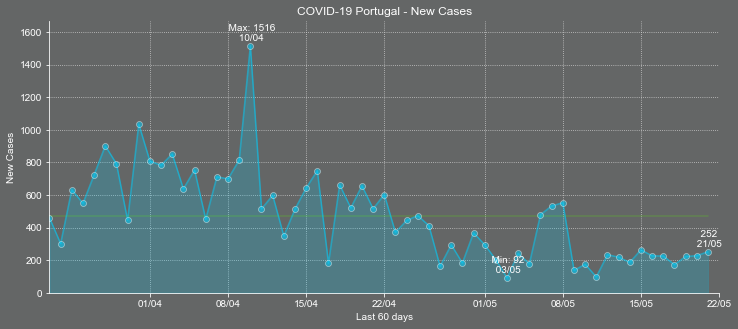

In [11]:
covid19_plot_df('confirmados_novos',data=df_latest,title='COVID-19 Portugal - New Cases',ylabel='New Cases',ycolor='#00D0FE')

In [12]:
# Trace outstanding vales
df_latest[['confirmados','confirmados_novos']]['2020-04-08':'2020-04-12']

,confirmados,confirmados_novos
data_dados,,
2020-04-08,13141,699
2020-04-09,13956,815
2020-04-10,15472,1516
2020-04-11,15987,515
2020-04-12,16585,598


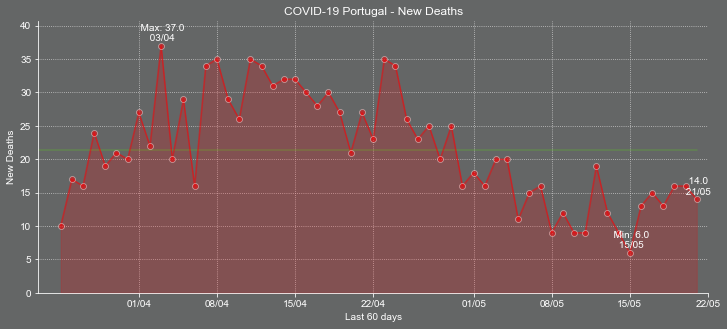

In [13]:
covid19_plot_df('obitos_novos',data=df_latest,title='COVID-19 Portugal - New Deaths',ylabel='New Deaths',ycolor='#FE0004')

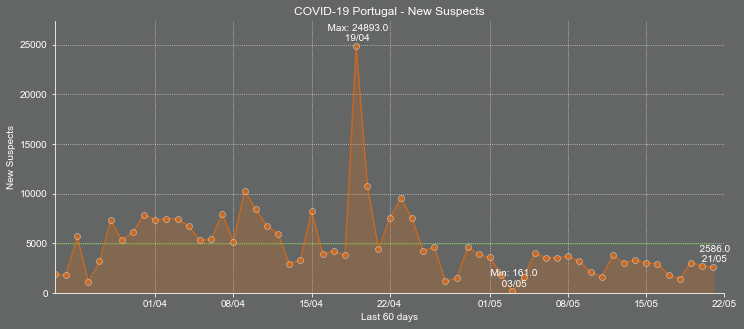

In [14]:
covid19_plot_df('suspeitos_novos',data=df_latest,title='COVID-19 Portugal - New Suspects',ylabel='New Suspects',ycolor='#FE6C00')


In [15]:
# Trace outstanding vales
df_latest[['suspeitos','suspeitos_novos']]['2020-04-16':'2020-04-20']

,suspeitos,suspeitos_novos
data_dados,,
2020-04-16,154727,3923.0
2020-04-17,158940,4213.0
2020-04-18,162711,3771.0
2020-04-19,187604,24893.0
2020-04-20,198353,10749.0


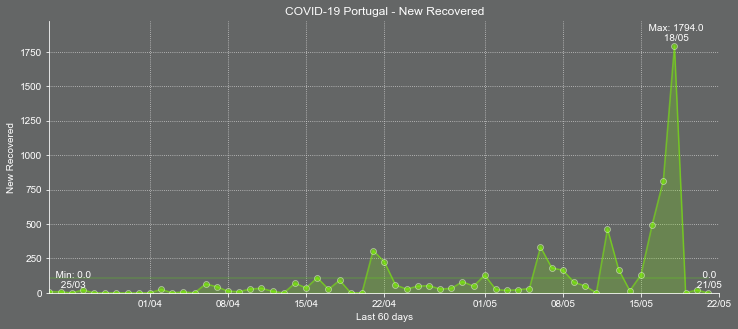

In [16]:
covid19_plot_df('recuperados_novos',data=df_latest,title='COVID-19 Portugal - New Recovered',ylabel='New Recovered',ycolor='#7FFE00')

In [17]:
# Trace outstanding vales
df_latest[['recuperados','recuperados_novos']]['2020-05-16':'2020-05-20']

,recuperados,recuperados_novos
data_dados,,
2020-05-16,3822,494.0
2020-05-17,4636,814.0
2020-05-18,6430,1794.0
2020-05-19,6431,1.0
2020-05-20,6452,21.0


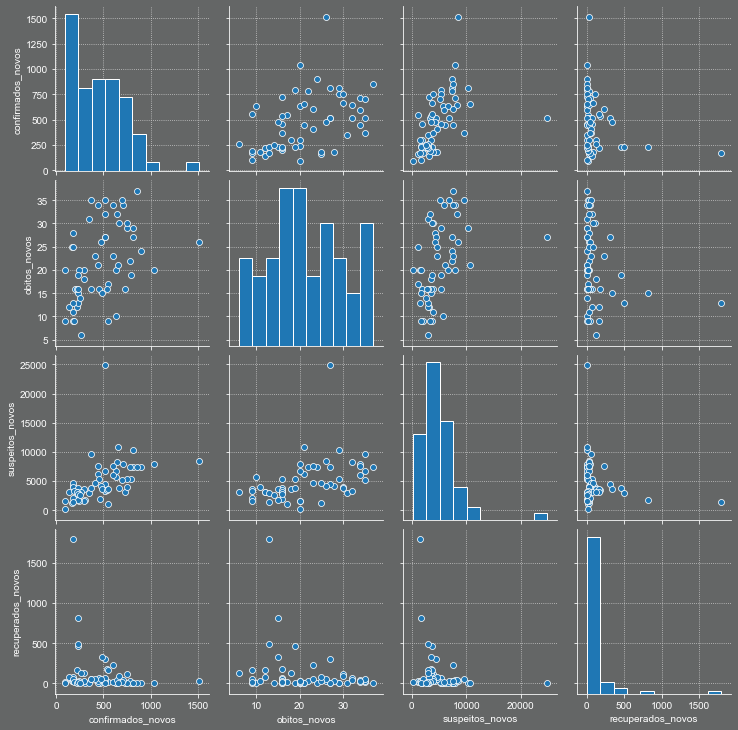

In [24]:
sns.pairplot(df_latest[['confirmados_novos','obitos_novos','suspeitos_novos','recuperados_novos']])
